## Usage of the fundus_image_toolbox

In [25]:
from matplotlib import pyplot as plt
from fundus_image_toolbox.utilities import show, print_type

First, load some images to work with

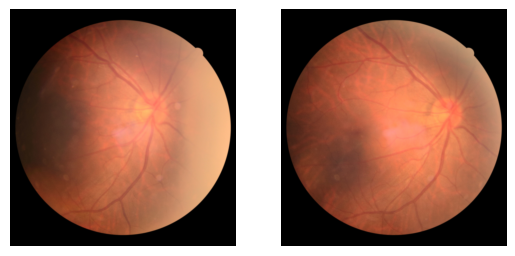

Type: <class 'numpy.ndarray'>
Shape: (1824, 1736, 3)
Type: uint8

Type: <class 'numpy.ndarray'>
Shape: (1824, 1736, 3)
Type: uint8



In [26]:
fundus1 = plt.imread('./imgs/fundus1.jpg')
fundus2 = plt.imread('./imgs/fundus2.jpg')

show([fundus1, fundus2])
print_type([fundus1, fundus2])

Note: When asked for a `device`, pass a the `'cpu'` to run the model(s) on your CPU or `'cuda:<x>'` for GPU usage (where `<x>` is the GPU number you want to use).

### Circle crop and center a fundus image

In [27]:
from fundus_image_toolbox.circle_crop import crop

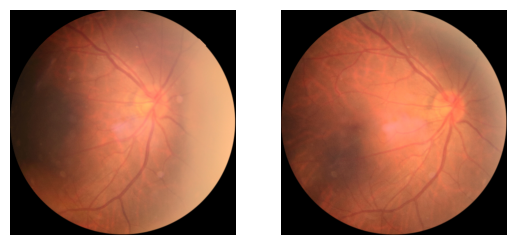

Type: <class 'numpy.ndarray'>
Shape: (512, 512, 3)
Type: uint8

Type: <class 'numpy.ndarray'>
Shape: (512, 512, 3)
Type: uint8



In [28]:
# Crop the image. `image` can be a path to a file or a numpy array or torch tensor
fundus1_cropped = crop(fundus1, size=(512,512))
fundus2_cropped = crop(fundus2, size=(512,512))

show([fundus1_cropped, fundus2_cropped])
print_type([fundus1_cropped, fundus2_cropped])

### Predict fovea and optic disc coordinates

In [29]:
from fundus_image_toolbox.fovea_od_localization import load_fovea_od_model, plot_coordinates

In [30]:
device = "cpu"
model, checkpoint_path = load_fovea_od_model(checkpoint_dir="default", device=device, return_test_dataloader=False)
# predict from batch (could pass a single image, too)
coordinates = model.predict([fundus1, fundus2])
print("\nCoordinates (fovea_x, fovea_y, od_x, od_y):\n", coordinates)

Initializing efficientnet-b3 on cpu
Loading model from /gpfs01/berens/user/jgervelmeyer/fundus_image_toolbox/fundus_image_toolbox/fovea_od_localization/models/2024-05-07 11:13.05/multi_efficientnet-b3_best.pt

Coordinates (fovea_x, fovea_y, od_x, od_y):
 [array([ 607.5915,  894.2683, 1091.1732,  773.3075], dtype=float32), array([ 628.94415,  939.20746, 1279.766  ,  810.58325], dtype=float32)]


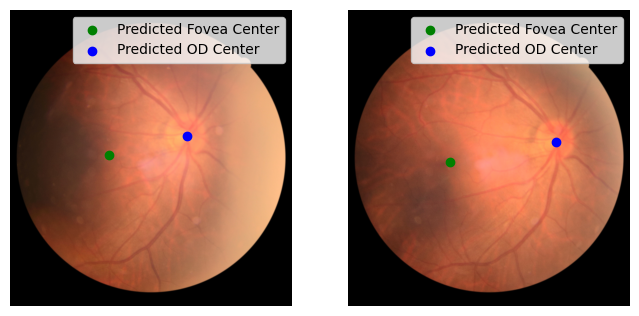

In [31]:
plot_coordinates([fundus1, fundus2], coordinates)

### Predict the quality (gradeability) of a fundus image

In [32]:
from fundus_image_toolbox.quality_prediction import load_quality_ensemble, ensemble_predict_quality, plot_quality

In [33]:
device = "cpu"

# Threshold for the quality prediction: Values below this threshold are considered as bad quality
threshold = 0.25

In [34]:
quality_ensemble = load_quality_ensemble(device=device)

Model loaded from 2024-05-03 14-38-34
Model loaded from 2024-05-03 14-25-19
Model loaded from 2024-05-03 14-25-42
Model loaded from 2024-05-03 14-58-37
Model loaded from 2024-05-03 16-23-29
Model loaded from 2024-05-03 15-28-00
Model loaded from 2024-05-03 15-04-29
Model loaded from 2024-05-06 20-25-14
Model loaded from 2024-05-03 15-52-56
Model loaded from 2024-05-03 15-59-31


In [35]:
# Predict quality of the fundus images. Could pass a single image, too.
confs, labels = ensemble_predict_quality(quality_ensemble, [fundus1, fundus2], threshold=threshold)

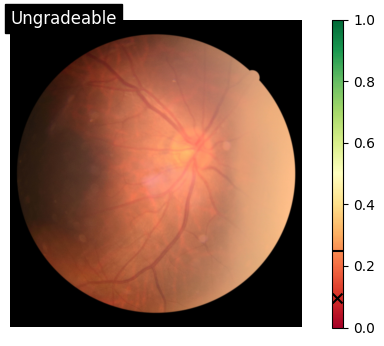

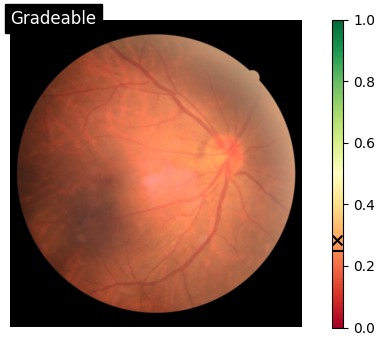

In [36]:
# Plot the quality of the fundus images (red: bad quality, green: good quality, x: model prediction, -: threshold)
plot_quality(fundus1, confs[0], labels[0], threshold)
plot_quality(fundus2, confs[1], labels[1], threshold)

### Register fundus images

In [37]:
from fundus_image_toolbox.registration import load_registration_model, register, DEFAULT_CONFIG

In [38]:
config = DEFAULT_CONFIG

# Change if desired, like: config['device'] = 'cpu'
display(config)

{'device': 'cuda:0',
 'use_matching_trick': True,
 'nms_size': 1,
 'nms_thresh': 0.0005,
 'knn_thresh': 0.85,
 'model_save_path': '/gpfs01/berens/user/jgervelmeyer/fundus_image_toolbox/fundus_image_toolbox/registration/SuperRetina/save/SuperRetina.pth',
 'model_image_height': 512,
 'model_image_width': 512}

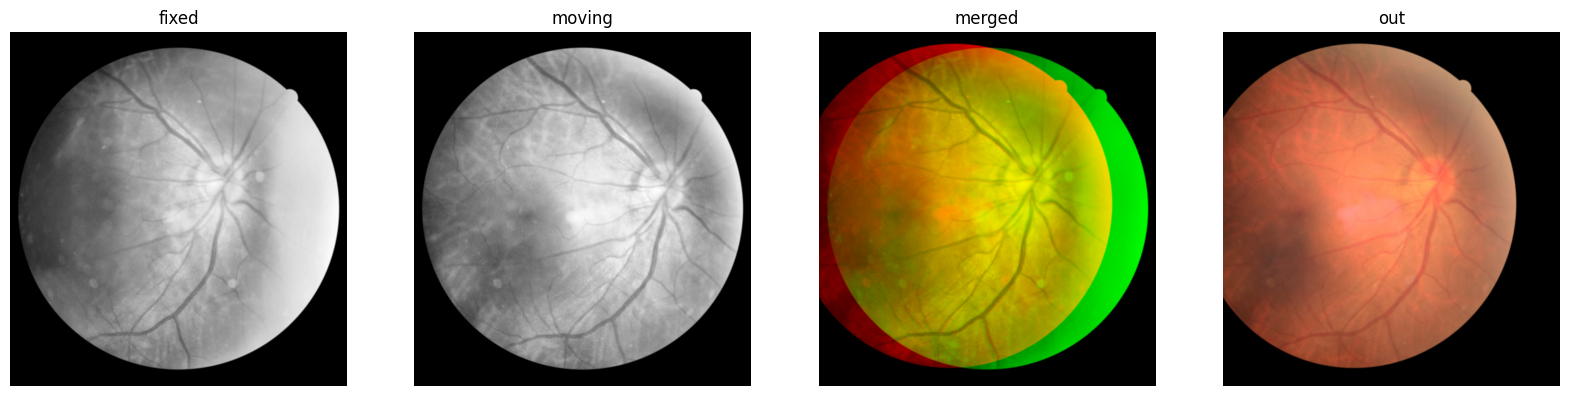

In [39]:
model, matcher = load_registration_model(config)

moving_image_aligned = register(
    fundus1, 
    fundus2, 
    show=True, 
    show_mapping=False, 
    config=config, 
    model=model, 
    matcher=matcher
)

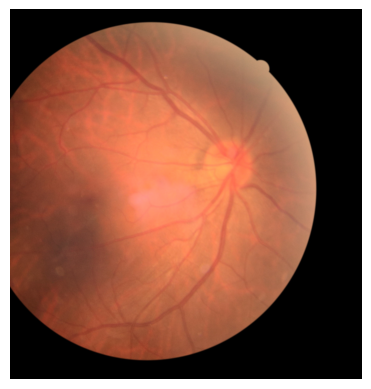

In [40]:
# Output: The moving image aligned to the fixed image
show(moving_image_aligned)

In [41]:
print_type(moving_image_aligned)

Type: <class 'numpy.ndarray'>
Shape: (1824, 1736, 3)
Type: uint8



### Segment the blood vessels in a fundus image

In [42]:
from fundus_image_toolbox.vessel_segmentation import load_segmentation_ensemble, ensemble_predict_segmentation, plot_masks

In [43]:
device = "cpu"

In [44]:
segmentation_ensemble = load_segmentation_ensemble(device=device)
vessel_masks = ensemble_predict_segmentation(segmentation_ensemble, [fundus1, fundus2], threshold=0.5)

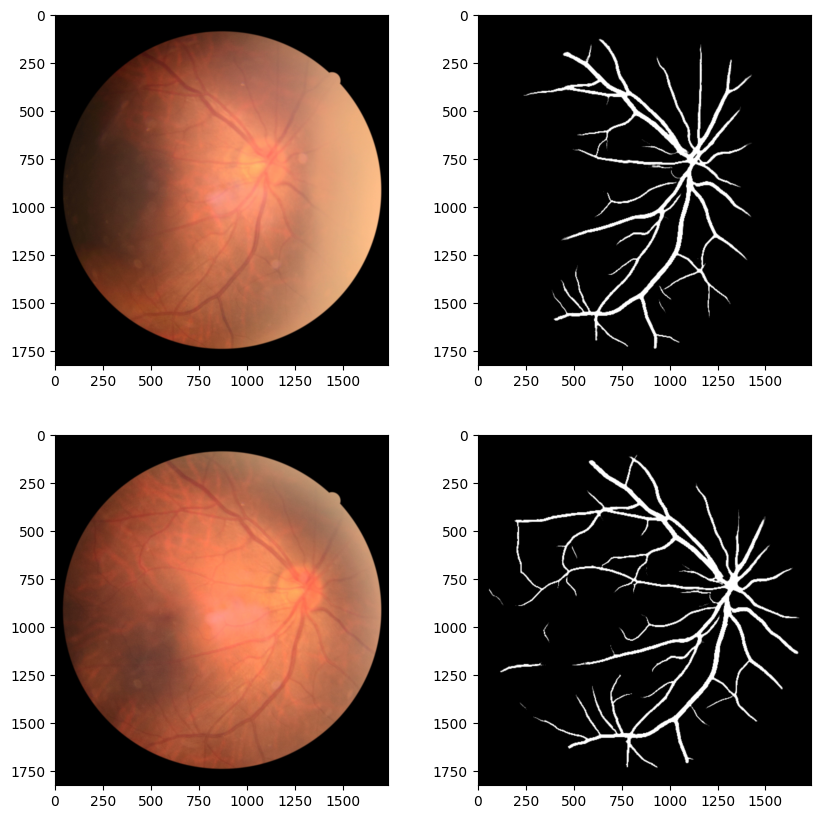

In [45]:
plot_masks([fundus1, fundus2], vessel_masks)

In [46]:
print_type(vessel_masks[0])
print_type(vessel_masks[1])

Type: <class 'numpy.ndarray'>
Shape: (1824, 1736)
Type: float64

Type: <class 'numpy.ndarray'>
Shape: (1824, 1736)
Type: float64

